In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


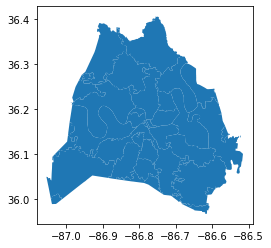

In [3]:
zipcodes.plot();

In [4]:
libraries = pd.read_csv('../data/Library_Facilities.csv')
print(libraries.shape)
libraries.head(3)

(21, 6)


,Library Name,Bus Route,address,location,lat,lng
0,East,"#20, #26","206 Gallatin Avenue\nNashville, TN 37206\n(36....","(36.17912, -86.750438)",36.179120,-86.750438
1,Hadley Park,#29,"1039 28th Ave., North\nNashville, TN 37208\n(3...","(36.166888, -86.820526)",36.166888,-86.820526
2,Inglewood,"#26 Local, #56 BRT","4312 Gallatin Pike\nNashville, TN 37216\n(36.2...","(36.225814, -86.725447)",36.225814,-86.725447


In [5]:
libraries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Library Name  21 non-null     object 
 1   Bus Route     20 non-null     object 
 2   address       21 non-null     object 
 3   location      21 non-null     object 
 4   lat           21 non-null     float64
 5   lng           21 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


In [6]:
libraries['geometry'] = libraries.apply(lambda x: Point((x.lng, x.lat)), axis=1)

In [7]:
libraries.head(3)

,Library Name,Bus Route,address,location,lat,lng,geometry
0,East,"#20, #26","206 Gallatin Avenue\nNashville, TN 37206\n(36....","(36.17912, -86.750438)",36.179120,-86.750438,POINT (-86.750438 36.17912)
1,Hadley Park,#29,"1039 28th Ave., North\nNashville, TN 37208\n(3...","(36.166888, -86.820526)",36.166888,-86.820526,POINT (-86.820526 36.166888)
2,Inglewood,"#26 Local, #56 BRT","4312 Gallatin Pike\nNashville, TN 37216\n(36.2...","(36.225814, -86.725447)",36.225814,-86.725447,POINT (-86.725447 36.225814)


In [8]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
lib_geo = gpd.GeoDataFrame(libraries, crs = zipcodes.crs, geometry = libraries['geometry'])

In [10]:
type(lib_geo)

geopandas.geodataframe.GeoDataFrame

In [12]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [13]:
lib_by_zip = gpd.sjoin(lib_geo, zipcodes, op = 'within')

In [14]:
lib_by_zip.head()

,Library Name,Bus Route,address,location,lat,lng,geometry,index_right,zip,po_name
0,East,"#20, #26","206 Gallatin Avenue\nNashville, TN 37206\n(36....","(36.17912, -86.750438)",36.179120,-86.750438,POINT (-86.75044 36.17912),13,37206,NASHVILLE
1,Hadley Park,#29,"1039 28th Ave., North\nNashville, TN 37208\n(3...","(36.166888, -86.820526)",36.166888,-86.820526,POINT (-86.82053 36.16689),40,37208,NASHVILLE
10,North,"#29, #42","1001 Monroe Street\nNashville, TN 37208\n(36.1...","(36.174413, -86.795942)",36.174413,-86.795942,POINT (-86.79594 36.17441),40,37208,NASHVILLE
2,Inglewood,"#26 Local, #56 BRT","4312 Gallatin Pike\nNashville, TN 37216\n(36.2...","(36.225814, -86.725447)",36.225814,-86.725447,POINT (-86.72545 36.22581),1,37216,NASHVILLE
3,Richland Park,#10,"4711 Charlotte Avenue\nNashville, TN 37209\n(3...","(36.152105, -86.84438)",36.152105,-86.844380,POINT (-86.84438 36.15210),12,37209,NASHVILLE


In [15]:
lib_by_zip['zip'].value_counts()

37203    2
37211    2
37208    2
37206    1
37138    1
37214    1
37210    1
37072    1
37076    1
37115    1
37013    1
37218    1
37221    1
37215    1
37219    1
37209    1
37216    1
37228    1
Name: zip, dtype: int64

In [18]:
lib_by_zip.shape

(21, 10)

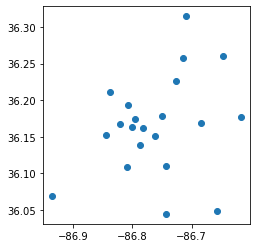

In [17]:
lib_by_zip.plot()
plt.show()

##### the issue I'm having is that my desired outcome is different from the outcome of the example I've been following along with (I don't want to look at only one zip code), so... this is where my confidence shakes, but let's give it a shot

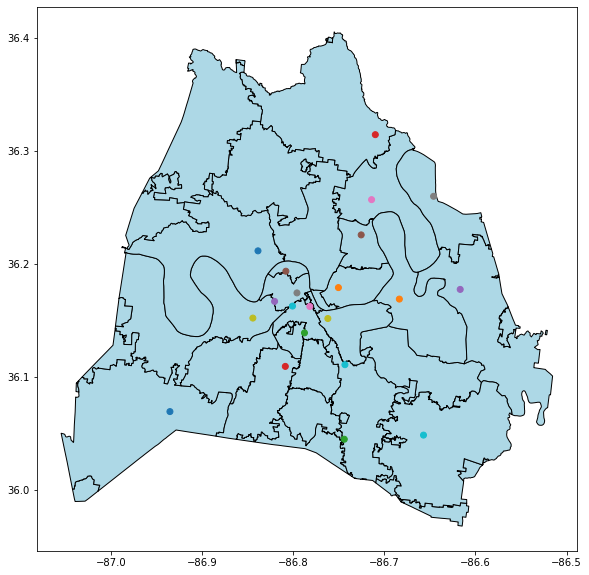

In [25]:
ax = zipcodes.plot(figsize = (10, 10), color = 'lightblue', 
                   edgecolor = 'black')
lib_by_zip.plot(ax = ax, column = 'Library Name')
plt.show()